# Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Hyper-parameters
input_size=1
output_size=1
num_epochs = 60
learning_rate =0.001

In [18]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [19]:
# Linear regression medel
model = nn.Linear(input_size,output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [20]:
# Train the model
for epoch in range(num_epochs) :
    # Convert numpy array to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 3 == 0 :
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,loss.item()))

Epoch [3/60], Loss: 35.9754
Epoch [6/60], Loss: 20.9905
Epoch [9/60], Loss: 12.2768
Epoch [12/60], Loss: 7.2098
Epoch [15/60], Loss: 4.2634
Epoch [18/60], Loss: 2.5500
Epoch [21/60], Loss: 1.5537
Epoch [24/60], Loss: 0.9744
Epoch [27/60], Loss: 0.6375
Epoch [30/60], Loss: 0.4416
Epoch [33/60], Loss: 0.3277
Epoch [36/60], Loss: 0.2614
Epoch [39/60], Loss: 0.2229
Epoch [42/60], Loss: 0.2005
Epoch [45/60], Loss: 0.1875
Epoch [48/60], Loss: 0.1799
Epoch [51/60], Loss: 0.1755
Epoch [54/60], Loss: 0.1729
Epoch [57/60], Loss: 0.1714
Epoch [60/60], Loss: 0.1706


## How optimizer.step() and loss.backward() related?

(1) Does optimzer.step() function optimize based on the closest loss.backward() function?

(2) what happens if I call several different backward() from losses and call optimizer.step()? </BR>
Does the optimizer optimize based on all previous called losses?

---
1. optimizer.step is performs a parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule. </BR>
As an example, the update rule for SGD is defined here:
https://github.com/pytorch/pytorch/blob/cd9b27231b51633e76e28b6a34002ab83b0660fc/torch/optim/sgd.py#L63 

the update is not the based on the “closest” call but on the .grad attribute. How you calculate the gradient is upto you.

2. Calling .backward() mutiple times accumulates the gradient (by addition) for each parameter. This is why you should call optimizer.zero_grad() after each .step() call. Note that following the first .backward call, a second call is only possible after you have performed another forward pass.

[Link](https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350)


## Why use zero grad in pytorch?
Since the backward() function accumulates gradients, and you don’t want to mix up gradients between minibatches, you have to zero them out at the start of a new minibatch. This is exactly like how a general (additive) accumulator variable is initialized to 0 in code.

[Link](https://discuss.pytorch.org/t/why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch/4903)

## Torch.nn vs Torch.nn.Functional
In PyTorch you define your Models as subclasses of torch.nn.Module.

In the `__init__` function, you are supposed to __initialize__ the layers you want to use. Unlike keras, Pytorch goes more low level and you have to specify the sizes of your network so that everything matches.

In the forward method, you __specify the connections__ of your layers. This means that you will use the layers you already initialized, in order to re-use the same layer for each forward pass of data you make.

torch.nn.Functional contains some useful functions like activation functions a convolution operations you can use. However, these are not full layers so if you want to specify a layer of any kind you should use torch.nn.Module.

You would use the torch.nn.Functional conv operations to define a custom layer for example with a convolution operation, but not to define a standard convolution layer.

A `nn.Module` is actually a OO wrapper around the functional interface, that contains a number of utility methods, like `eval()` and `parameters()`, and it automatically creates the parameters of the modules for you.
you can use the functional interface whenever you want, but that requires you to define the weights by hand. 

[Link](https://discuss.pytorch.org/t/how-to-choose-between-torch-nn-functional-and-torch-nn-module/2800)

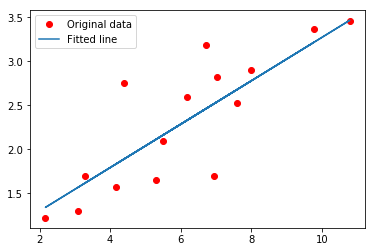

In [22]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')